In [1]:
import glob, os, os.path, re
import numpy as np, pandas as pd, seaborn as sns
from pprint import pprint

<Axes: xlabel='n_tokens', ylabel='runtime_sec'>

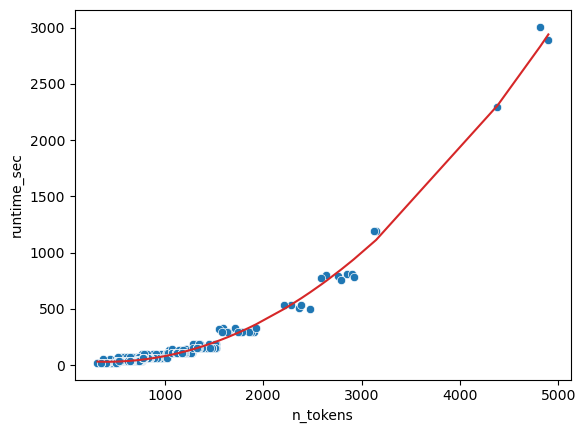

In [2]:
def parse_(file):
    with open(file, 'r') as handle:
        ll = handle.readlines()
    rr = [
        r'(\S+) (\S+) (\S+) (\S+) Calculating bucket size for input with (?P<n_tokens>[-+]?\d+) tokens.',
        r'Running model inference and extracting output structures for seeds \(4,\) took (?P<runtime_sec>[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?) seconds.',
        r'Done processing fold input (?P<done_processing>\S+).'
    ]
    d = dict()
    for l in ll:
        for r in rr:
            m = re.fullmatch(r, l.rstrip())
            if m:
                d.update(m.groupdict())
                if 'done_processing' in d.keys():
                    yield(d.copy())
                    d.clear()

def parse_file_(fp_):
    return pd.DataFrame.from_records(parse_(fp_)).astype({'n_tokens': int, 'runtime_sec': float})

files_ = glob.glob('af3_flu/.snakemake-eu/logs/25-04-07/alphafold3_predictions_batch*/alphafold3_predictions_batch*.txt')
df_ = pd.concat([ parse_file_(file_) for file_ in files_], axis=0)
predict_runtime = np.poly1d(np.polyfit(x=df_.n_tokens, y=df_.runtime_sec, deg=2))
sns.scatterplot(df_, x='n_tokens', y='runtime_sec')
sns.lineplot(x=df_.n_tokens, y=predict_runtime(df_.n_tokens), color='tab:red')

In [3]:
predict_runtime

poly1d([ 1.44451398e-04, -1.18261348e-01,  5.38503478e+01])